In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Digit/housing.csv")
data

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load data ke dalam dataframe
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/drive/MyDrive/Digit/housing.csv',names=column_names, header=None, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']
X.shape, y.shape

((506, 13), (506,))

In [ ]:
df = pd.get_dummies(df, columns=['CHAS'],drop_first=True)

In [ ]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0


In [ ]:
#membagi data menjadi pelatihan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
#Data Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
    remainder='passthrough'
    )

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT'])])

In [ ]:
ct.transform(X_train)
ct.transform(X_test)
ct.transform(X_valid);

In [ ]:
import tensorflow as tf

In [ ]:
#Membuat Model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])

In [ ]:
history_1 = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid,y_valid))

Epoch 1/150
12/12 [==============================] - 1s 15ms/step - loss: 62.8945 - mae: 62.8945 - val_loss: 25.3797 - val_mae: 25.3797
Epoch 2/150
12/12 [==============================] - 0s 3ms/step - loss: 23.6306 - mae: 23.6306 - val_loss: 13.1955 - val_mae: 13.1955
Epoch 3/150
12/12 [==============================] - 0s 4ms/step - loss: 11.3958 - mae: 11.3958 - val_loss: 11.2155 - val_mae: 11.2155
Epoch 4/150
12/12 [==============================] - 0s 4ms/step - loss: 8.8338 - mae: 8.8338 - val_loss: 7.6632 - val_mae: 7.6632
Epoch 5/150
12/12 [==============================] - 0s 4ms/step - loss: 7.1297 - mae: 7.1297 - val_loss: 6.3695 - val_mae: 6.3695
Epoch 6/150
12/12 [==============================] - 0s 4ms/step - loss: 6.0538 - mae: 6.0538 - val_loss: 4.9884 - val_mae: 4.9884
Epoch 7/150
12/12 [==============================] - 0s 4ms/step - loss: 5.2698 - mae: 5.2698 - val_loss: 4.9961 - val_mae: 4.9961
Epoch 8/150
12/12 [==============================] - 0s 3ms/step - los

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                140       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


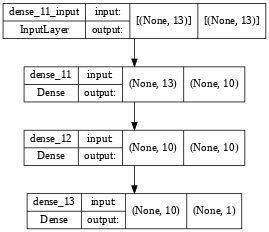

In [ ]:
#visualisasi model
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

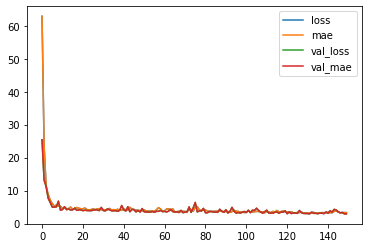

In [ ]:
pd.DataFrame(history_1.history).plot();

In [ ]:
#evaluasi model 
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.1056 - mae: 4.1056


[4.105618476867676, 4.105618476867676]

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

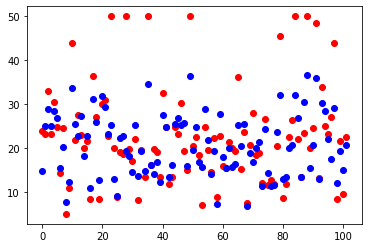

In [ ]:
plt.figure()
plt.scatter(range(len(y_test)),y_test,color='red')
plt.scatter(range(len(y_pred)),y_pred,color='blue');